### Задание 7. Выбор признаков. 
Датасет: https://www.kaggle.com/amir75/caesarean-section-classification 

В папке data: Caesarian Section Classification Dataset.csv

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures

import warnings
warnings.filterwarnings("ignore")

#### 1.	Загрузить датасет в Python.

In [2]:
df = pd.read_csv('./data/Caesarian Section Classification Dataset.csv')
df.head(10)

,Age,Delivey No,Delivery No,Blood of Pressure,Heart Problem,Caesarian
0,22,1,Timely,High,apt,No
1,26,2,Timely,Normal,apt,Yes
2,26,2,Premature,Normal,apt,No
3,28,1,Timely,High,apt,No
4,22,2,Timely,Normal,apt,Yes
5,26,1,Premature,Low,apt,No
6,27,2,Timely,Normal,apt,No
7,32,3,Timely,Normal,apt,Yes
8,28,2,Timely,Normal,apt,No
9,27,1,Premature,Normal,apt,yes


#### 2.	Описать набор данных и решаемую задачу.
#### 4.	Удалить ненужные данные, проанализировать отсутствующие значения.
#### 5.	Прокомментировать количественные параметры датасета.

Этот набор данных содержит информацию о результатах кесарева сечения у 80 беременных женщин с наиболее важными характеристиками проблем с родами в медицинской области.

Задача обучения - задача бинарной классификации

Целевая переменная ->> Caesarian (делать/не делать кесарево)

In [3]:
print("Количество наблюдений ->> ", df.shape[0], "\nКоличество признаков ->> ", df.shape[1]-1)

Количество наблюдений ->>  80 
Количество признаков ->>  5


In [4]:
# типы переменных и пустые значения
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                80 non-null     int64 
 1   Delivey No         80 non-null     int64 
 2   Delivery No        80 non-null     object
 3   Blood of Pressure  80 non-null     object
 4   Heart Problem      80 non-null     object
 5   Caesarian          80 non-null     object
dtypes: int64(2), object(4)
memory usage: 3.9+ KB


In [5]:
# описательная статистика для числовых признаков
df.describe()

,Age,Delivey No
count,80.000000,80.000000
mean,27.687500,1.662500
std,5.017927,0.794662
min,17.000000,1.000000
25%,25.000000,1.000000
50%,27.000000,1.000000
75%,32.000000,2.000000
max,40.000000,4.000000


In [6]:
# уникальные значения (количество и сами значения)
for col in df.columns:
    print(col, " -> ", len(df[col].unique()), df[col].unique())

Age  ->  22 [22 26 28 27 32 36 33 23 20 29 25 37 24 18 30 40 31 19 21 35 17 38]
Delivey No  ->  4 [1 2 3 4]
Delivery No  ->  3 ['Timely' 'Premature' 'Latecomer']
Blood of Pressure  ->  4 ['High' 'Normal' 'Low' 'low']
Heart Problem  ->  2 ['apt' 'inept']
Caesarian  ->  3 ['No' 'Yes' 'yes']


In [7]:
# преобразуем аномальные значения
df['Blood of Pressure'] = df['Blood of Pressure'].replace('low','Low')
df['Caesarian'] = df['Caesarian'].replace('yes','Yes')

In [8]:
for col in df.columns:
    print(col, " -> ", len(df[col].unique()), df[col].unique())

Age  ->  22 [22 26 28 27 32 36 33 23 20 29 25 37 24 18 30 40 31 19 21 35 17 38]
Delivey No  ->  4 [1 2 3 4]
Delivery No  ->  3 ['Timely' 'Premature' 'Latecomer']
Blood of Pressure  ->  3 ['High' 'Normal' 'Low']
Heart Problem  ->  2 ['apt' 'inept']
Caesarian  ->  2 ['No' 'Yes']


In [ ]:
# пустых значений нет, преобразовывать не нужно

In [9]:
# преобразуем все характеристики в числовые
df = pd.get_dummies(df,drop_first=True)
df.head()

,Age,Delivey No,Delivery No_Premature,Delivery No_Timely,Blood of Pressure_Low,Blood of Pressure_Normal,Heart Problem_inept,Caesarian_Yes
0,22,1,0,1,0,0,0,0
1,26,2,0,1,0,1,0,1
2,26,2,1,0,0,1,0,0
3,28,1,0,1,0,0,0,0
4,22,2,0,1,0,1,0,1


#### 3.	Выделить целевую переменную и факторные переменные.
#### 6.	Разбить выборку на обучающую и тестовую.

In [10]:
# целевая переменная и факторы
Y = df['Caesarian_Yes']
X = df.drop(['Caesarian_Yes'], axis=1)

# обучающая и тестовая выборки
X_train, X_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size=0.25,
                                                    random_state=True)

#### 7.	Работа по вариантам.

Вариант 4. Выбор признаков.
Данный вариант предполагает фокусировку на улучшении модели путем ввода новых признаков в модель. Следует подготовить модель к обучению, обучить модель и зафиксировать начальный уровень эффективности. Затем следует исследовать влияние исключения существующих и введения новых признаков в модель на эффективность. Как вариант можно рассматривать введение полиномиальных признаков. Следует стремиться к максимальному увеличению эффективности модели.

##### Построение модели и оценка качества до добавления и исключения признаков

In [11]:
cls = LogisticRegression()
cls.fit(X_train, y_train)
y_pred = cls.predict(X_test)

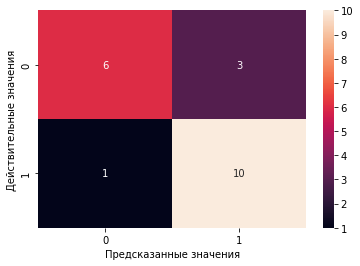

Метрика достоверности предсказания ->>  0.8
Метрика точности ->>  0.7692307692307693
Метрика полноты ->>  0.9090909090909091
              precision    recall  f1-score   support

           0       0.86      0.67      0.75         9
           1       0.77      0.91      0.83        11

    accuracy                           0.80        20
   macro avg       0.81      0.79      0.79        20
weighted avg       0.81      0.80      0.80        20



In [12]:
sns.heatmap(pd.DataFrame(
            metrics.confusion_matrix(y_test, y_pred)),
            annot=True)
plt.ylabel('Действительные значения')
plt.xlabel('Предсказанные значения')
plt.show()

print('Метрика достоверности предсказания ->> ', metrics.accuracy_score(y_test, y_pred))
print('Метрика точности ->> ', metrics.precision_score(y_test, y_pred))
print('Метрика полноты ->> ', metrics.recall_score(y_test, y_pred))

print(metrics.classification_report(y_test, y_pred))

##### Работа с признаками

<AxesSubplot:>

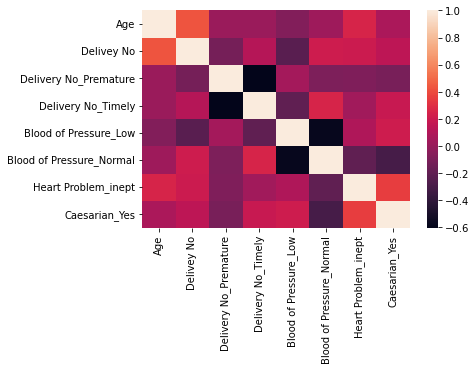

In [13]:
hm = sns.heatmap(df.corr(),
                 #cbar=True,
                 #annot=True
                )
hm

При преобразовании в числовые признаки создались дополнительные столбцы, объеденим их обратно в один

In [14]:
# Delivery No: 0 - Latecomer; 1 - Premature; 2 - Timely
X_train['Delivery No'] = X_train['Delivery No_Premature'] + X_train['Delivery No_Timely']*2
X_train = X_train.drop(['Delivery No_Premature','Delivery No_Timely'], axis=1)

X_test['Delivery No'] = X_test['Delivery No_Premature'] + X_test['Delivery No_Timely']*2
X_test = X_test.drop(['Delivery No_Premature','Delivery No_Timely'], axis=1)

In [15]:
# Blood of Pressure: 0 - High; 1 - Low; 2 - Normal
X_train['Blood of Pressure'] = X_train['Blood of Pressure_Low'] + X_train['Blood of Pressure_Normal']*2
X_train = X_train.drop(['Blood of Pressure_Low','Blood of Pressure_Normal'], axis=1)

X_test['Blood of Pressure'] = X_test['Blood of Pressure_Low'] + X_test['Blood of Pressure_Normal']*2
X_test = X_test.drop(['Blood of Pressure_Low','Blood of Pressure_Normal'], axis=1)

Введем полиномиальные признаки

In [16]:
poly_transformer = PolynomialFeatures(degree = 2, 
                                      interaction_only=True,
                                      include_bias=False)

poly_transformer.fit(X_train)
X_train_poly = poly_transformer.transform(X_train)
X_test_poly = poly_transformer.transform(X_test)

In [17]:
poly_transformer.get_feature_names(input_features = X_train.columns)

['Age',
 'Delivey No',
 'Heart Problem_inept',
 'Delivery No',
 'Blood of Pressure',
 'Age Delivey No',
 'Age Heart Problem_inept',
 'Age Delivery No',
 'Age Blood of Pressure',
 'Delivey No Heart Problem_inept',
 'Delivey No Delivery No',
 'Delivey No Blood of Pressure',
 'Heart Problem_inept Delivery No',
 'Heart Problem_inept Blood of Pressure',
 'Delivery No Blood of Pressure']

##### Построение модели и оценка качества после добавления и исключения признаков

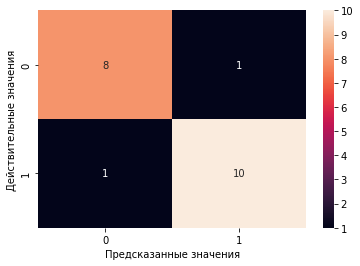

Метрика достоверности предсказания ->>  0.9
Метрика точности ->>  0.9090909090909091
Метрика полноты ->>  0.9090909090909091
              precision    recall  f1-score   support

           0       0.89      0.89      0.89         9
           1       0.91      0.91      0.91        11

    accuracy                           0.90        20
   macro avg       0.90      0.90      0.90        20
weighted avg       0.90      0.90      0.90        20



In [18]:
cls_ = LogisticRegression()
cls_.fit(X_train_poly, y_train)
y_pred_ = cls_.predict(X_test_poly)

sns.heatmap(pd.DataFrame(
            metrics.confusion_matrix(y_test, y_pred_)),
            annot=True)
plt.ylabel('Действительные значения')
plt.xlabel('Предсказанные значения')
plt.show()

print('Метрика достоверности предсказания ->> ', metrics.accuracy_score(y_test, y_pred_))
print('Метрика точности ->> ', metrics.precision_score(y_test, y_pred_))
print('Метрика полноты ->> ', metrics.recall_score(y_test, y_pred_))

print(metrics.classification_report(y_test, y_pred_))

Максимальные значения метрик достигаются при следующих значениях:
- degree = 2
- interaction_only=True